Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6474 - loss: 1.0358 - val_accuracy: 0.8213 - val_loss: 0.5093
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8172 - loss: 0.5271 - val_accuracy: 0.8363 - val_loss: 0.5051
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8321 - loss: 0.4764 - val_accuracy: 0.8737 - val_loss: 0.3914
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8463 - loss: 0.4333 - val_accuracy: 0.8725 - val_loss: 0.3852
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8594 - loss: 0.3872 - val_accuracy: 0.8825 - val_loss: 0.3691
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8698 - loss: 0.3618 - val_accuracy: 0.8725 - val_loss: 0.3752
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8793 - loss: 0.3323 - val_accuracy: 0.8863 - val_loss: 0.3562
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8890 - loss: 0.3101 - val_accuracy: 0.8800 - val_

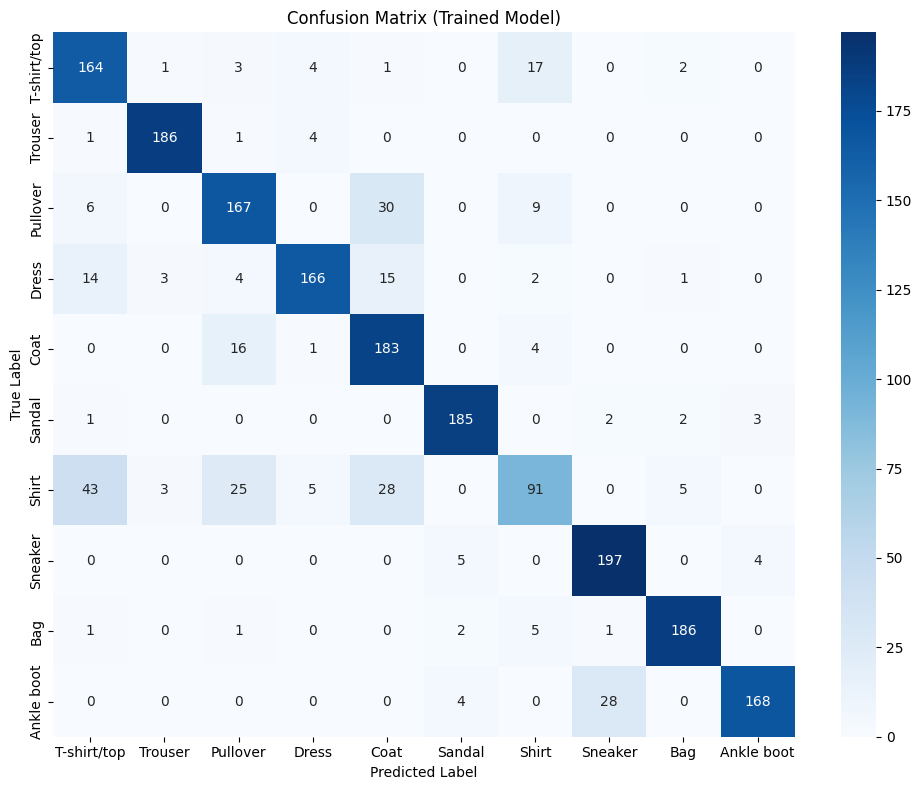

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv("/content/fashion-mnist_test.csv")

# Prepare features and labels
X = df.drop('label', axis=1).values / 255.0  # Normalize pixel values
y = df['label'].values
y_cat = to_categorical(y, num_classes=10)

# Split into training and testing sets
X_train, X_test, y_train_cat, y_test_cat, y_train, y_test = train_test_split(
    X, y_cat, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Flatten(input_shape=(784,)),  # 28x28 images
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Trained Model)')
plt.tight_layout()
plt.show()